# Task1

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import matrix

train = pd.read_csv('train.csv')
X1= train["x1"]
X2 = train["x2"]
y=train["y"]
X=pd.concat([X1, X2],axis=1)

X=np.array(X)
y=np.array(y)

[[-0.11409821  0.54276209]
 [ 2.17240497  1.42969436]
 [-1.09561292  0.66390311]
 ...
 [ 2.1043933   1.89778426]
 [-0.57418837  1.36457791]
 [ 1.8085673   1.77157905]]


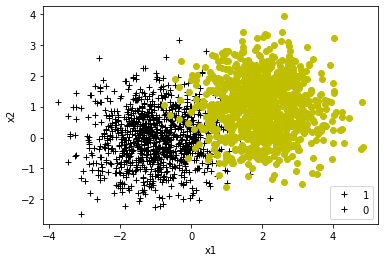

In [2]:
def plotData(X, y):

    pos = np.nonzero(y == 1) 
    neg = np.nonzero(y == 0)

    plt.plot(X[pos, 0], X[pos, 1], 'k+', label='1')
    plt.plot(X[neg, 0], X[neg, 1], 'ko', color='y', label='0')
    
plotData(X, y)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(('1', '0'), loc='lower right')
print(X)

In [3]:
m,n=np.shape(X)
X_1=np.hstack((np.ones((m,1)),X))
print(X_1)
X_1 = np.matrix(X_1)


y = y.reshape((m, 1))
y = np.matrix(y)
#print(y)
theta=np.zeros((n+1,1))
theta=np.matrix(theta)
print("\n")
print(theta)


[[ 1.         -0.11409821  0.54276209]
 [ 1.          2.17240497  1.42969436]
 [ 1.         -1.09561292  0.66390311]
 ...
 [ 1.          2.1043933   1.89778426]
 [ 1.         -0.57418837  1.36457791]
 [ 1.          1.8085673   1.77157905]]


[[0.]
 [0.]
 [0.]]


In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
m,n = X_1.shape
def costFunction(theta,X,y):
    y_pred = sigmoid(np.dot(X,theta)) #[2000x1]
    cost = (-1/m) * sum(np.multiply(y, np.log(y_pred))+ np.multiply((1-y), np.log(1-y_pred)))
    
    grad = (1/m)*np.dot(X.transpose(),(y_pred-y))
    return cost, grad

In [6]:
cost ,grad = costFunction(theta,X_1,y)

In [7]:
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is [[0.69314718]]
Gradient at initial theta (zeros): [[0.        ]
 [0.75113139]
 [0.24558093]]


now for the optimizing algorithm, 

In [8]:
def gradient_Descent(theta,X,y,alpha, max_cnt):
    costs_list = []
    for i in range(max_cnt):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha*grad)
        costs_list.append(cost)
    return theta

In [9]:
theta = gradient_Descent(theta,X_1,y,alpha=0.01,max_cnt=10000)
print(theta)

[[ 1.87457305]
 [-2.98722105]
 [-0.87536977]]


[[-0.11409821  0.54276209]
 [ 2.17240497  1.42969436]
 [-1.09561292  0.66390311]
 ...
 [ 2.1043933   1.89778426]
 [-0.57418837  1.36457791]
 [ 1.8085673   1.77157905]]
[-3.74312095  4.82604619]
<class 'numpy.ndarray'>
[ 14.91495732 -14.32753809]
<class 'numpy.ndarray'>


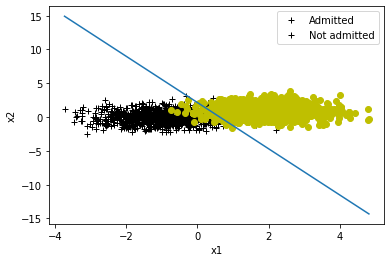

In [10]:
plotData(X, y)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(('1', '0'), loc='lower right')
print(X)

plot_x = np.array([np.min(X_1[:, 1]), np.max(X_1[:, 1])])
print(plot_x)
print(type(plot_x))
      
    
    
plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])
plot_y=np.asarray(plot_y).flatten()

print(plot_y)
print(type(plot_y))
      
plt.plot(plot_x, plot_y)
        
       
plt.legend(('Admitted', 'Not admitted'), loc='upper right')

# Task2

In [11]:
test = pd.read_csv('test.csv')
X1= test["x1"]
X2 = test["x2"]
X=pd.concat([X1, X2],axis=1)
X=np.array(X)
print(X)

[[ 1.99866424e+00  1.03763425e+00]
 [-9.03050738e-01  1.36260460e-01]
 [ 1.85993458e+00  6.92388322e-01]
 [-9.16909862e-01  1.90845306e-01]
 [ 1.63381505e+00  9.18835928e-01]
 [-1.15403004e+00 -2.29554200e-01]
 [-9.09118549e-01  3.51964726e-01]
 [ 2.07005323e+00  1.32673396e+00]
 [-1.03993050e+00  1.20694018e-01]
 [-1.00646377e+00 -2.56591390e-01]
 [-1.34548615e+00  1.43191422e-01]
 [-1.05624823e+00  2.82568452e-01]
 [-6.38836211e-01  3.38202460e-02]
 [-9.45678807e-01 -9.52042100e-02]
 [ 1.48904092e+00  7.54778654e-01]
 [ 2.21305169e+00  1.00319706e+00]
 [-1.10228723e+00  4.79974827e-01]
 [-9.83589903e-01  1.32862983e-01]
 [ 1.98090977e+00  9.93045120e-01]
 [-9.52120735e-01  2.28148391e-01]
 [-7.61801733e-01  2.66070894e-01]
 [-9.37702234e-01 -1.90440072e-01]
 [-1.03591524e+00 -8.38530050e-02]
 [-1.01442512e+00 -6.85956210e-02]
 [-1.15118189e+00 -1.42829927e-01]
 [ 1.60791468e+00  6.48984860e-01]
 [-1.02735895e+00  2.84496950e-02]
 [ 2.02936563e+00  9.57586445e-01]
 [-1.06256534e+00  1

In [12]:
m,n=np.shape(X)
X=np.hstack((np.ones((m,1)),X))
X = np.matrix(X)
print(X)


[[ 1.00000000e+00  1.99866424e+00  1.03763425e+00]
 [ 1.00000000e+00 -9.03050738e-01  1.36260460e-01]
 [ 1.00000000e+00  1.85993458e+00  6.92388322e-01]
 [ 1.00000000e+00 -9.16909862e-01  1.90845306e-01]
 [ 1.00000000e+00  1.63381505e+00  9.18835928e-01]
 [ 1.00000000e+00 -1.15403004e+00 -2.29554200e-01]
 [ 1.00000000e+00 -9.09118549e-01  3.51964726e-01]
 [ 1.00000000e+00  2.07005323e+00  1.32673396e+00]
 [ 1.00000000e+00 -1.03993050e+00  1.20694018e-01]
 [ 1.00000000e+00 -1.00646377e+00 -2.56591390e-01]
 [ 1.00000000e+00 -1.34548615e+00  1.43191422e-01]
 [ 1.00000000e+00 -1.05624823e+00  2.82568452e-01]
 [ 1.00000000e+00 -6.38836211e-01  3.38202460e-02]
 [ 1.00000000e+00 -9.45678807e-01 -9.52042100e-02]
 [ 1.00000000e+00  1.48904092e+00  7.54778654e-01]
 [ 1.00000000e+00  2.21305169e+00  1.00319706e+00]
 [ 1.00000000e+00 -1.10228723e+00  4.79974827e-01]
 [ 1.00000000e+00 -9.83589903e-01  1.32862983e-01]
 [ 1.00000000e+00  1.98090977e+00  9.93045120e-01]
 [ 1.00000000e+00 -9.52120735e-

In [14]:
def predict(X,theta):
    return sigmoid(np.dot(X,theta))
preds=predict(X,theta)
preds=np.asarray(preds).flatten()

list_preds=[]
list_preds=[1 if i>0.5 else 0 for i in preds]
list_preds.append(list_preds)
print(list_preds)

[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, [...]]
